In [3]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [4]:
# import csv file
df = pd.read_csv(r"C:\Users\Aamir choudhary\Downloads\SuperStoreOrders.csv\SuperStoreOrders.csv")

In [5]:
df.shape

(51290, 21)

In [7]:
df.head(3)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011


In [8]:
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014
51289,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3,3,0.2,-0.6048,0.17,Medium,2014


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [10]:
#check for null values
pd.isnull(df).sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [11]:
# drop null values
df.dropna(inplace=True)

In [12]:
# 1) comma, space hatao
df['sales'] = df['sales'].str.replace(',', '').str.strip()

# 2) numeric me convert karo, galat values ko NaN bana do

df['sales'] = pd.to_numeric(df['sales'], errors='coerce')


In [13]:
# change data type
df['sales'] = df['sales'].astype('int64')

In [14]:

df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce')




In [15]:
df['ship_date'] = pd.to_datetime(df['ship_date'], dayfirst=True, errors='coerce')

In [16]:
df['order_date'].dtypes

dtype('<M8[ns]')

In [17]:
df['ship_date'].dtypes

dtype('<M8[ns]')

In [18]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [19]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,20067,19834,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-05-02 23:06:58.179099904,2013-05-10 01:01:29.664212992,246.498440,3.476545,0.142908,28.641740,26.375915,2012.777208
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.000000,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,2012-06-08 00:00:00,2012-06-11 00:00:00,31.000000,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,2013-07-02 00:00:00,2013-07-04 00:00:00,85.000000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,2014-05-11 00:00:00,2014-06-01 00:00:00,251.000000,5.000000,0.200000,36.810000,24.450000,2014.000000
max,2014-12-12 00:00:00,2015-01-07 00:00:00,22638.000000,14.000000,0.850000,8399.976000,933.570000,2014.000000
std,NaN,NaN,487.567175,2.278766,0.212280,174.424113,57.296804,1.098931


In [20]:
# use describe() for specific columns
df[['quantity', 'sales', 'profit']].describe()

,quantity,sales,profit
count,51290.000000,51290.000000,51290.000000
mean,3.476545,246.498440,28.641740
std,2.278766,487.567175,174.424113
min,1.000000,0.000000,-6599.978000
25%,2.000000,31.000000,0.000000
50%,3.000000,85.000000,9.240000
75%,5.000000,251.000000,36.810000
max,14.000000,22638.000000,8399.976000


In [18]:
df.head(2)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011


# Exploratory Data Analysis

In [22]:
df.groupby('year')['sales'].sum()


year
2011    2259511
2012    2677493
2013    3405860
2014    4300041
Name: sales, dtype: int64

In [23]:
df.groupby('category')['profit'].sum().sort_values(ascending=False)


category
Technology         663778.73318
Office Supplies    518473.83430
Furniture          286782.25380
Name: profit, dtype: float64

In [24]:
df.groupby('region')['sales'].sum()


region
Africa             783776
Canada              66932
Caribbean          324281
Central           2822399
Central Asia       752839
EMEA               806184
East               678834
North             1248192
North Asia         848349
Oceania           1100207
South             1600960
Southeast Asia     884438
West               725514
Name: sales, dtype: int64

In [25]:
df.groupby('ship_mode')['shipping_cost'].mean()


ship_mode
First Class       41.053065
Same Day          42.937453
Second Class      30.469747
Standard Class    19.971755
Name: shipping_cost, dtype: float64

In [26]:
df[['discount','profit']].corr()


,discount,profit
discount,1.000000,-0.316375
profit,-0.316375,1.000000


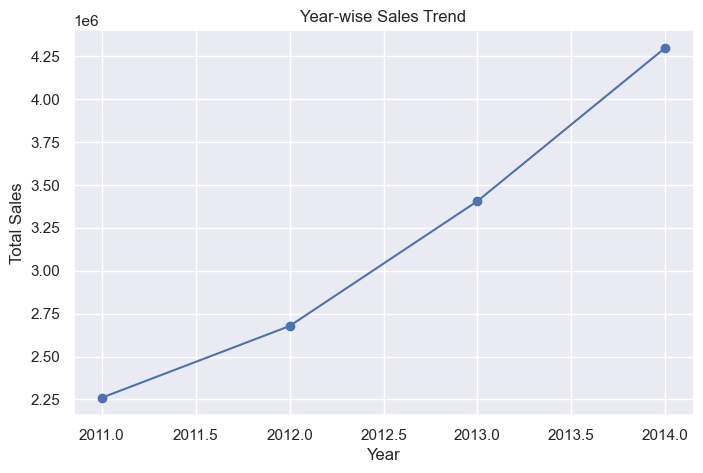

In [31]:
plt.figure(figsize=(8,5))
df.groupby('year')['sales'].sum().plot(kind='line', marker='o')
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


Observation

The year-wise sales trend indicates continuous growth from 2011 to 2014. Sales increased steadily each year,
with the highest sales recorded in 2014.
This upward trend reflects strong business expansion and increasing customer demand over time.

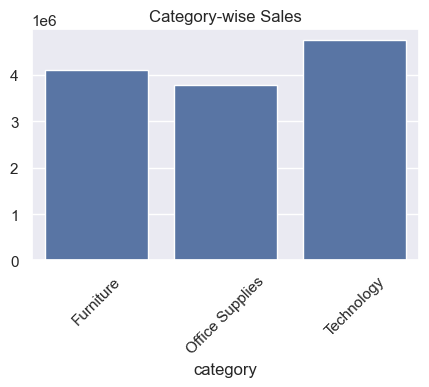

In [34]:
plt.figure(figsize=(5,3))
sns.barplot(x=df.groupby('category')['sales'].sum().index,
            y=df.groupby('category')['sales'].sum().values)
plt.title('Category-wise Sales')
plt.xticks(rotation=45)
plt.show()


Observation

Technology is the best-performing category in terms of both sales and profit,
while Furniture and Office Supplies show comparatively lower performance.

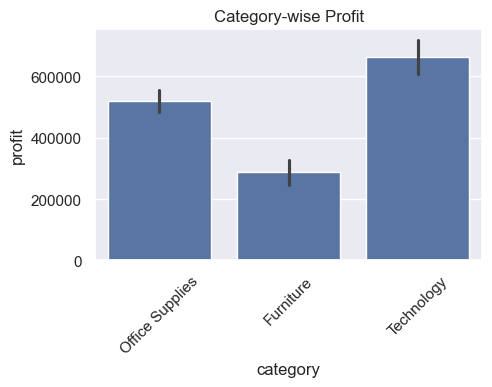

In [36]:
plt.figure(figsize=(5,3))
sns.barplot(x='category', y='profit', data=df, estimator=sum)
plt.title('Category-wise Profit')
plt.xticks(rotation=45)
plt.show()


Observation

Technology is the most profitable category, followed by Office Supplies, while Furniture generates comparatively lower profit.

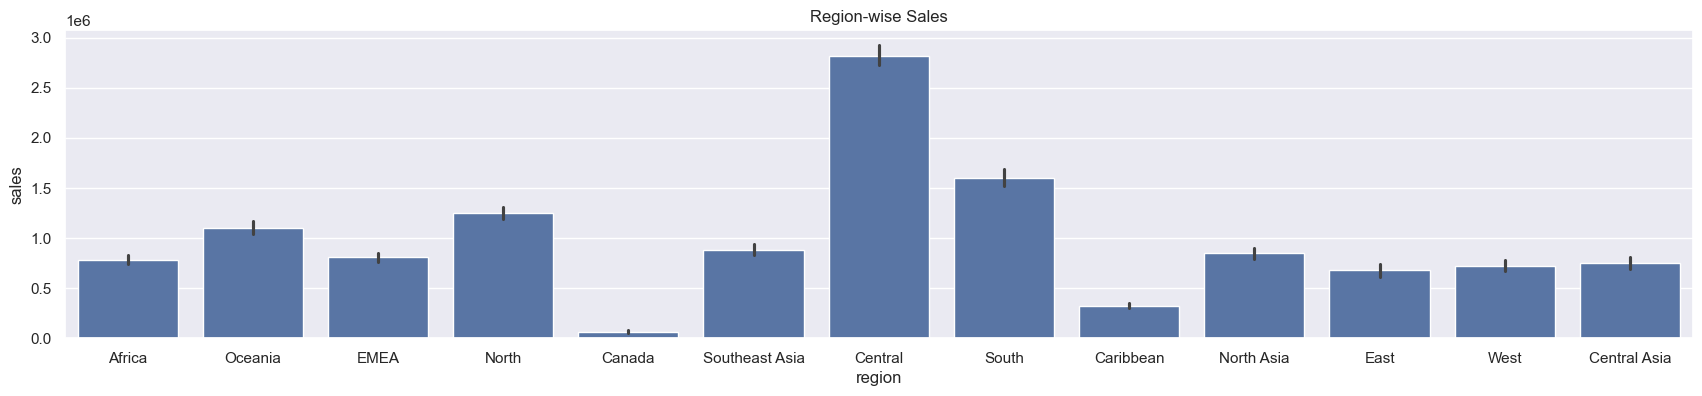

In [38]:
plt.figure(figsize=(21,4))
sns.barplot(x='region', y='sales', data=df, estimator=sum)
plt.title('Region-wise Sales')
plt.show()


Observation

Sales and profit are concentrated in specific regions and sub-categories,
highlighting the importance of focusing on high-performing segments.

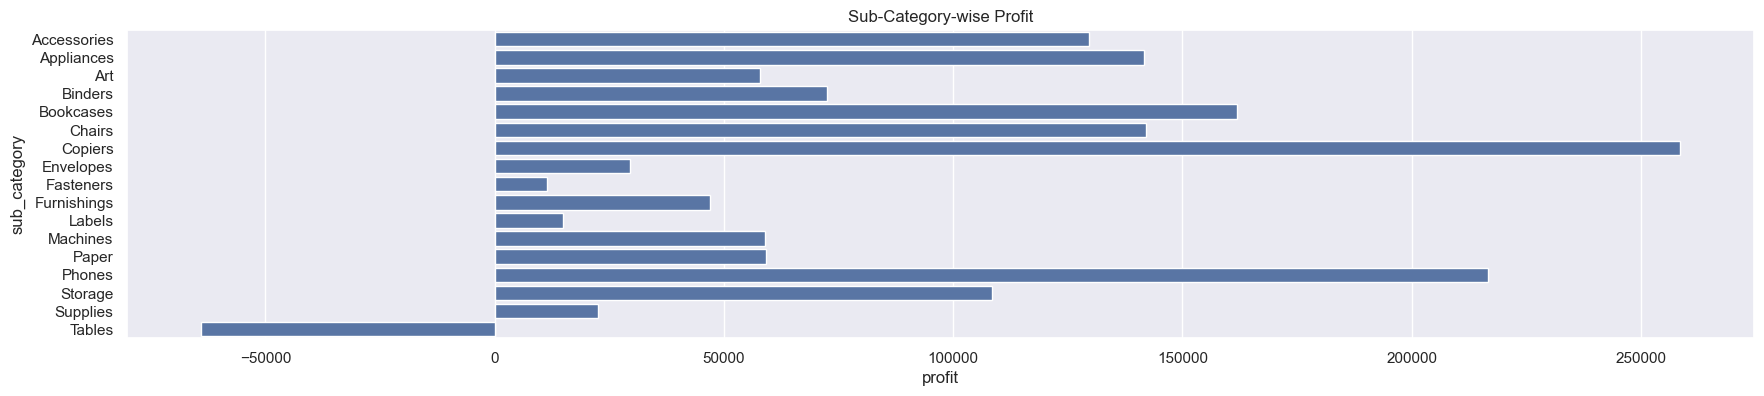

In [39]:
sub_profit = df.groupby('sub_category')['profit'].sum().reset_index()

sns.barplot(x='profit', y='sub_category', data=sub_profit)
plt.title('Sub-Category-wise Profit')
plt.show()


Observation 1: Sub-Category-wise Profit

Key Insights:

Highest Profit:

         Copiers generate the maximum profit among all sub-categories.This indicates high margin and strong demand.

Strong Performing Sub-Categories:

                  Phones, Chairs, Storage, and Accessories show consistently high positive profits.These are reliable revenue contributors.

Moderate Profit:

          Binders, Paper, Furnishings, and Machines give average profit, neither very high nor very low.Loss-Making Sub-Category:

Tables show a negative profit (loss).

           This suggests high cost, low margin, or discount issues.

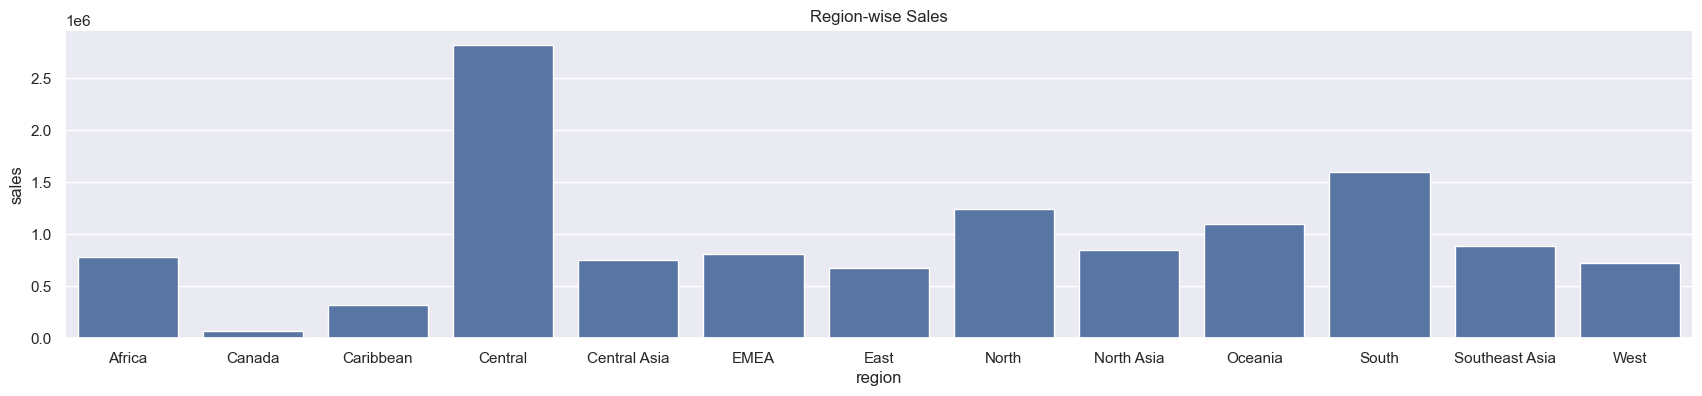

In [40]:
region_sales = df.groupby('region')['sales'].sum().reset_index()

sns.barplot(x='region', y='sales', data=region_sales)
plt.title('Region-wise Sales')
plt.show()


Observation

The Central region has the highest sales.

South and North regions show moderate sales performance.

Canada, Caribbean, and Africa have the lowest sales.

Sales vary significantly across regions, indicating uneven market performance.

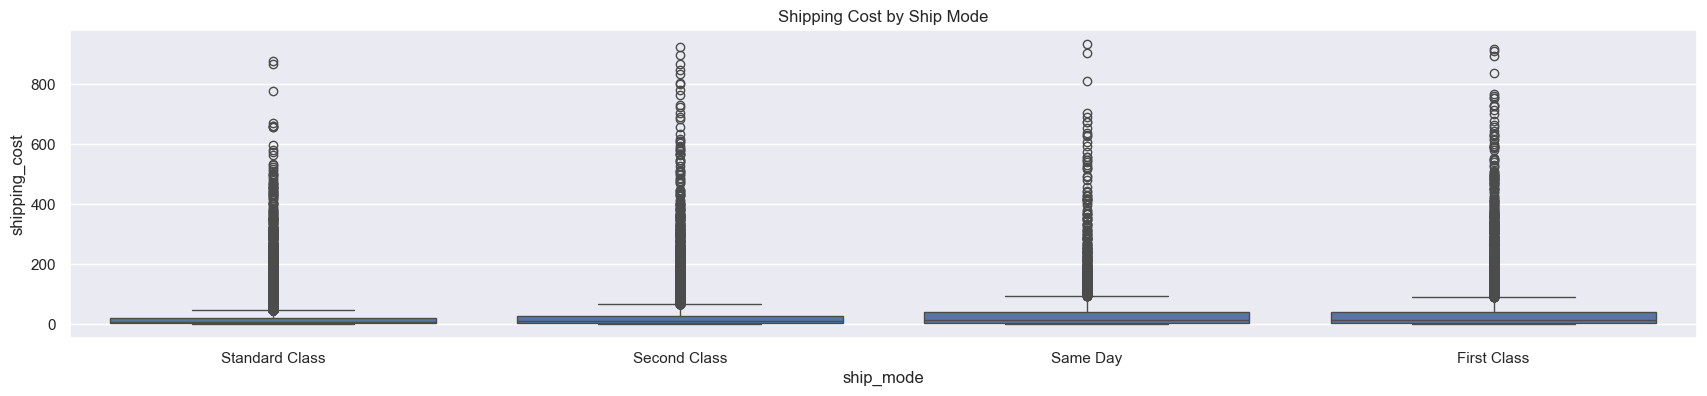

In [41]:
sns.boxplot(x='ship_mode', y='shipping_cost', data=df)
plt.title('Shipping Cost by Ship Mode')
plt.show()


Observation

The analysis reveals that Standard Class shipping has the highest cost variability and maximum outliers,
Making it the most unpredictable option. Same Day shipping is the most cost-stable,
While Second and First Class provide a balanced trade-off between cost and delivery speed.
Optimizing ship mode selection can significantly reduce logistics costs.

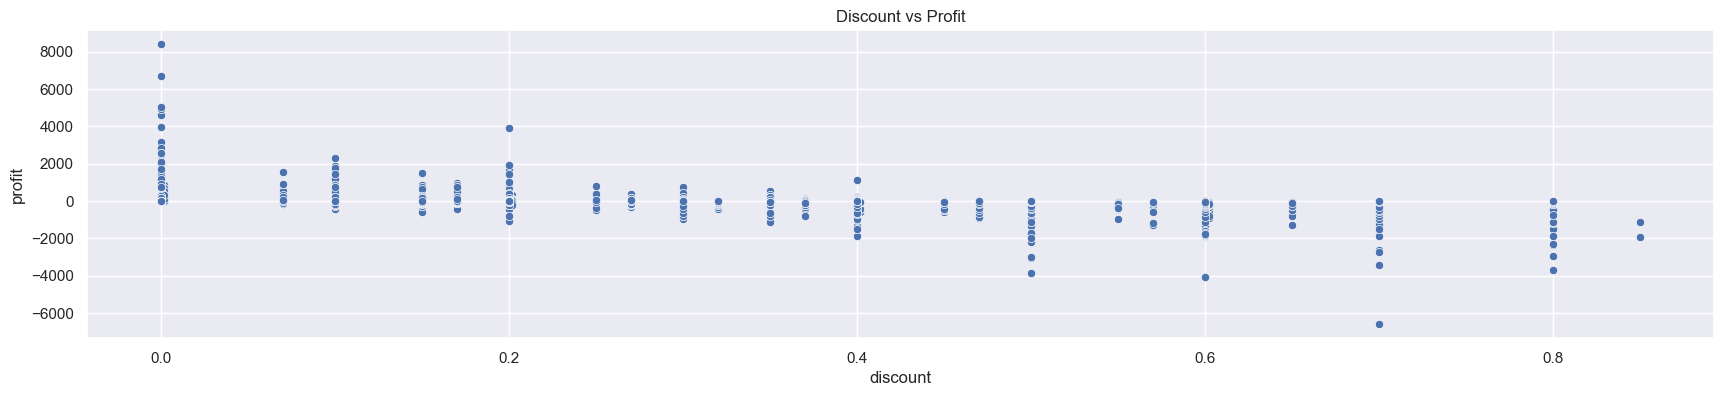

In [42]:
sns.scatterplot(x='discount', y='profit', data=df)
plt.title('Discount vs Profit')
plt.show()


Observation

The analysis clearly shows an inverse relationship between discount and profit. 
While small discounts can help boost sales without harming profitability,
Excessive discounts significantly reduce profit and often lead to losses.
A balanced discount strategy is essential for sustainable business growth.

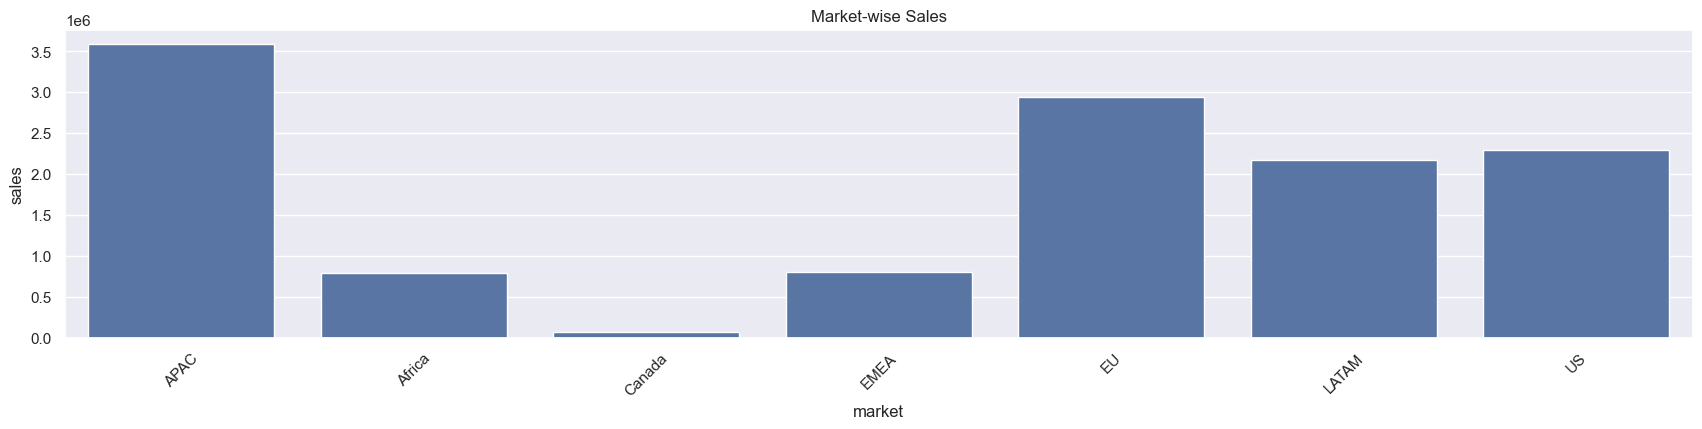

In [43]:
market_sales = df.groupby('market')['sales'].sum().reset_index()

sns.barplot(x='market', y='sales', data=market_sales)
plt.title('Market-wise Sales')
plt.xticks(rotation=45)
plt.show()


Observation

The market-wise sales analysis reveals that APAC is the top-performing market,
followed by EU and the US. In contrast, Africa, EMEA, and Canada show relatively low sales and require targeted business strategies to improve performance.

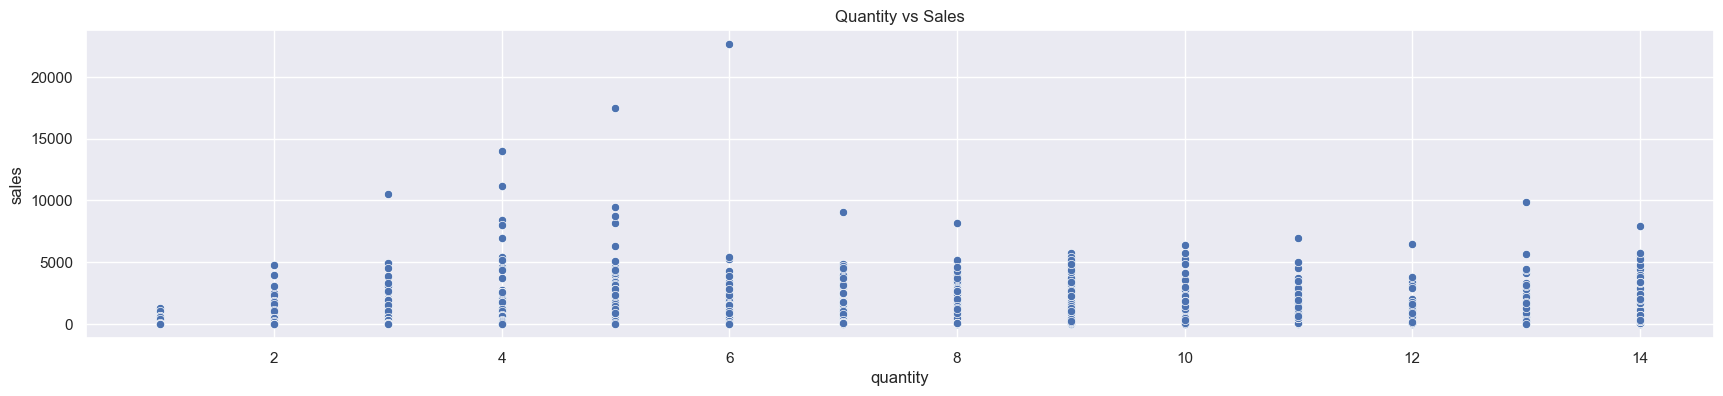

In [44]:
sns.scatterplot(x='quantity', y='sales', data=df)
plt.title('Quantity vs Sales')
plt.show()


Observation

The analysis shows a positive relationship between quantity and sales, with bulk orders contributing significantly to revenue. Additionally, 
most orders fall under standard priority, 
indicating predictable delivery requirements. Optimizing bulk sales strategies and standard delivery operations can improve overall business performance.

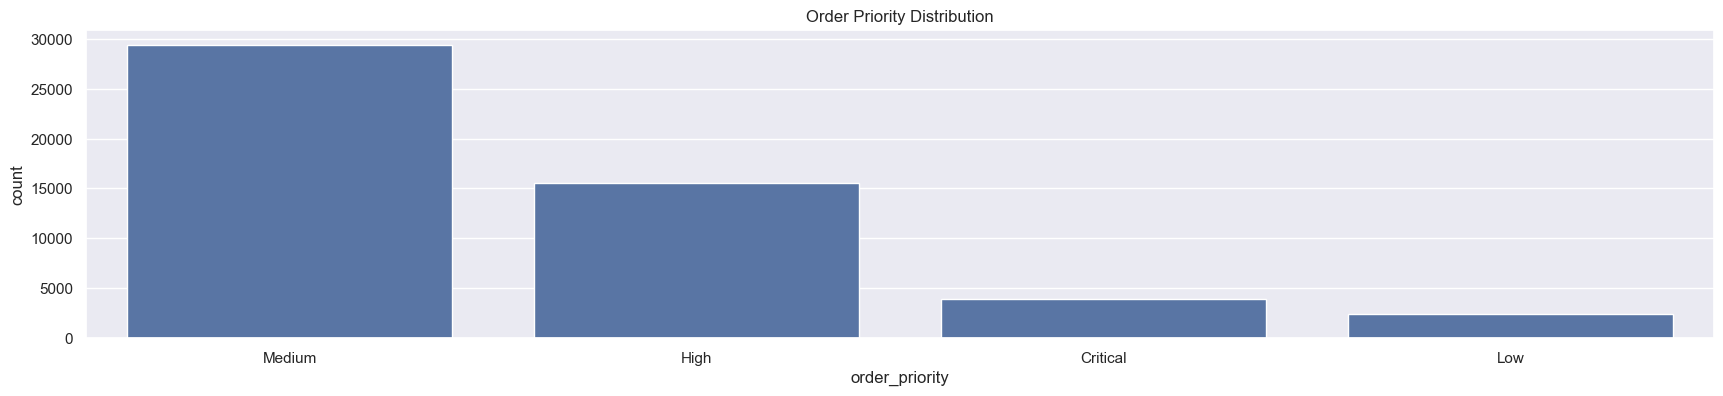

In [45]:
sns.countplot(x='order_priority', data=df)
plt.title('Order Priority Distribution')
plt.show()


Observation

The analysis reveals that medium-priority orders dominate customer preferences, while sales data shows a right-skewed distribution with most orders having low to moderate value. A small number of high-value orders significantly contribute to overall revenue, highlighting the importance of both volume and value-based strategies.

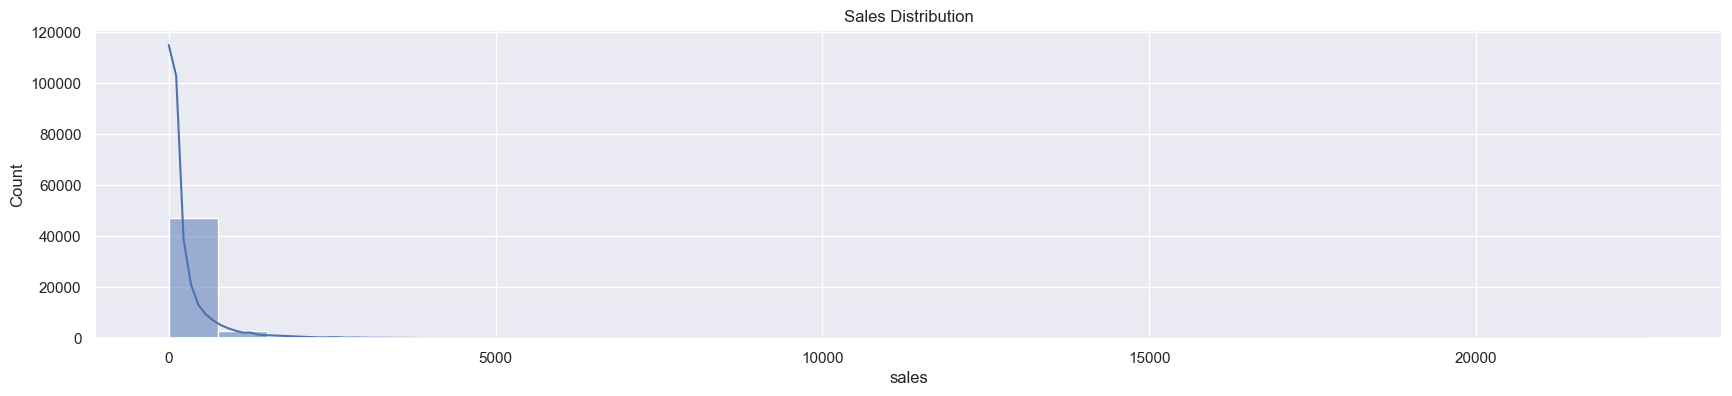

In [46]:
sns.histplot(df['sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.show()


Observation

The sales distribution shows a right-skewed pattern where most orders are of low value,
while a small number of high-value orders significantly impact overall revenue. 
This highlights the importance of balancing high-volume sales strategies with targeted efforts to grow and retain high-value customers.

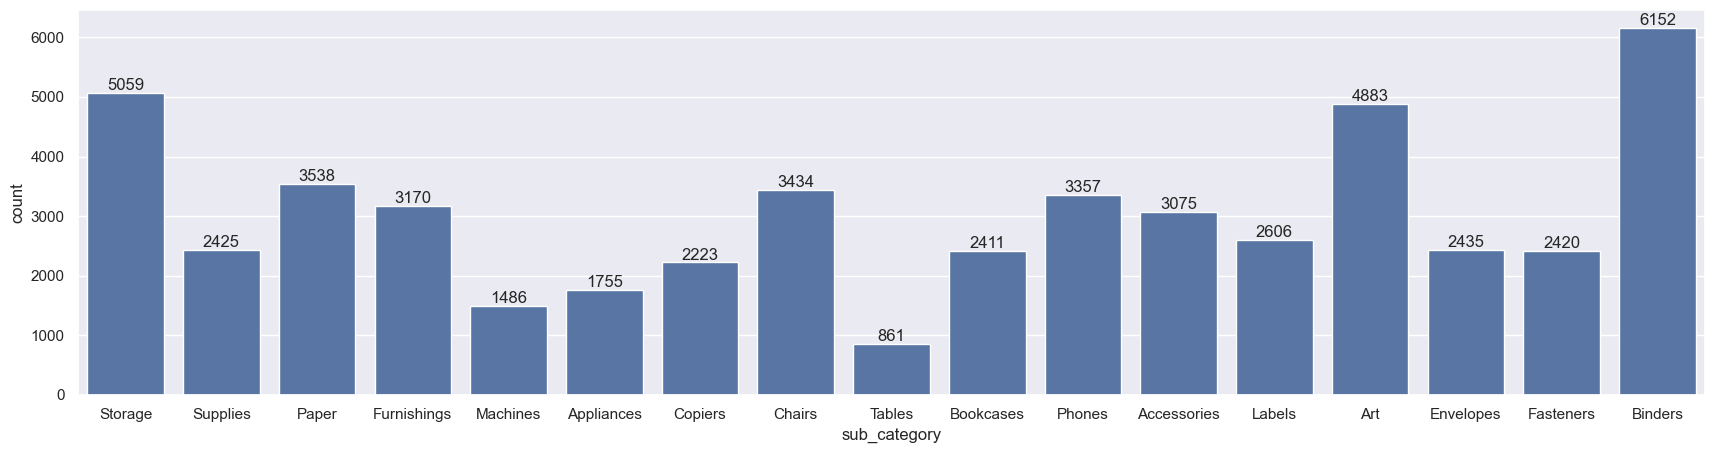

In [24]:
# plotting a bar chart for sub_category and it's count

ax = sns.countplot(x = 'sub_category',data = df)
sns.set(rc={'figure.figsize':(21,5)})
for bars in ax.containers:
    ax.bar_label(bars)

Observation

The sub-category analysis shows that a few categories dominate order volume, while several others contribute fewer but potentially higher-value orders. An effective business strategy should balance high-volume sales with targeted efforts to grow profitable, low-volume categories.

In [7]:
region_sp = df.groupby('region')[['sales','profit']].sum().reset_index()


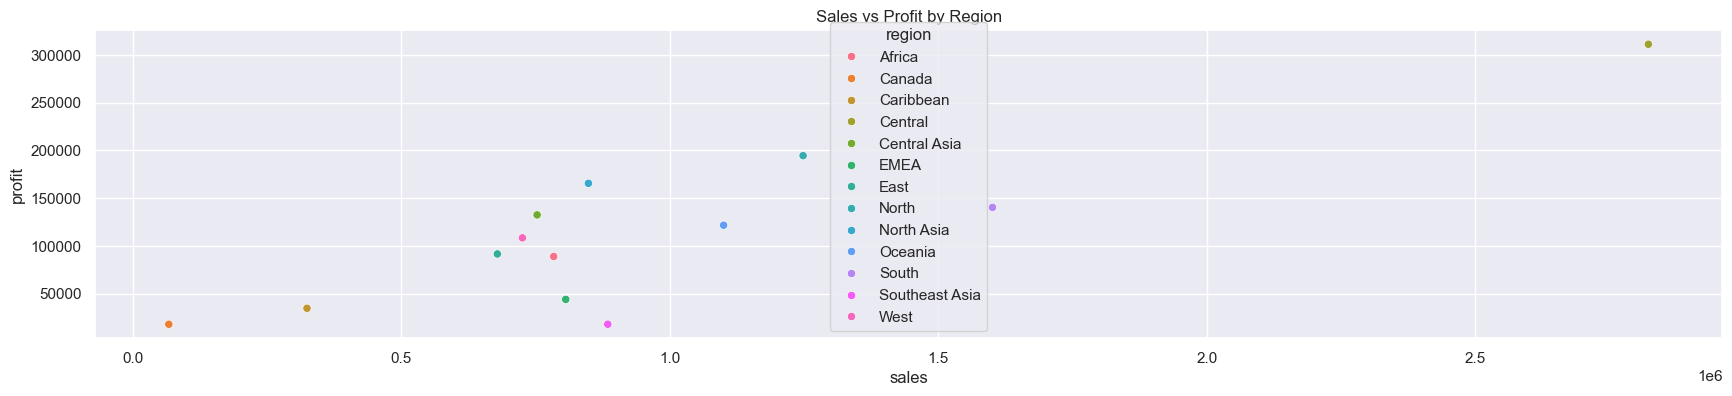

In [50]:
sns.scatterplot(x='sales', y='profit', hue='region', data=region_sp)
sns.set(rc={'figure.figsize':(21,5)})
plt.title('Sales vs Profit by Region')
plt.show()


Observation

The Sales vs Profit analysis by region shows a positive relationship between sales and profit. However, not all regions convert sales into profit equally. Some regions demonstrate higher profitability even with moderate sales, while others show reduced profit despite high sales. This highlights the need for region-specific strategies to improve overall business performance.

In [6]:
loss_cat = df.groupby('category')['profit'].sum().reset_index()


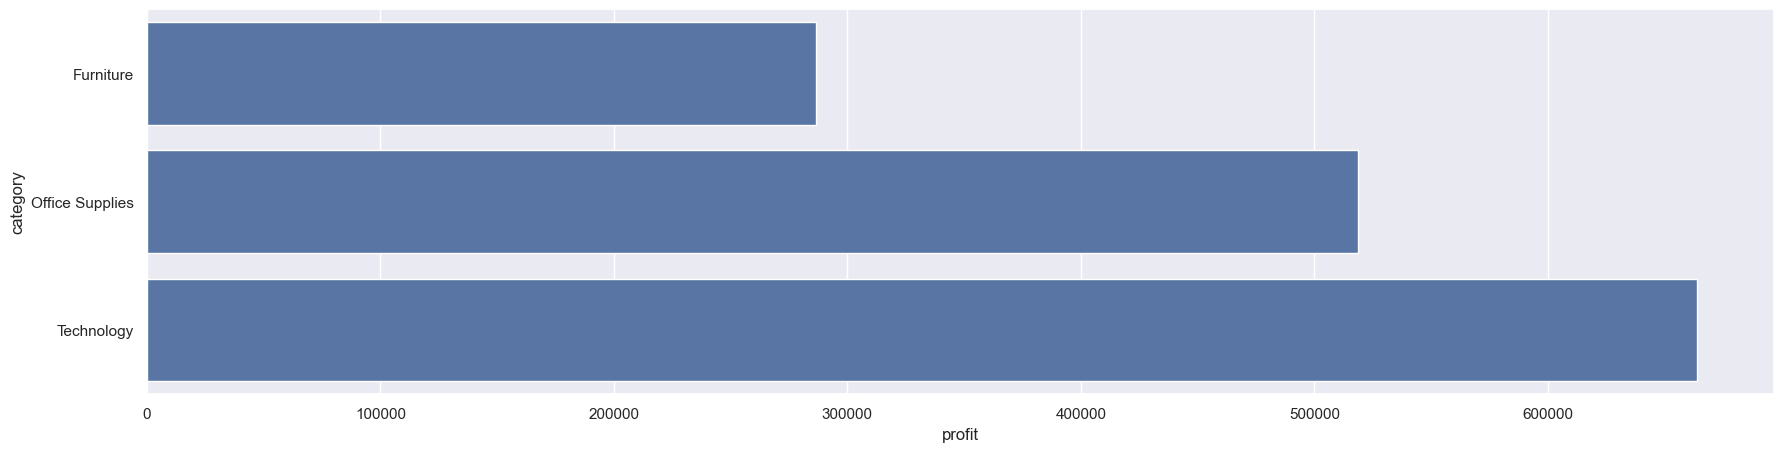

In [52]:
sns.barplot(x='profit', y='category', data=loss_cat)
plt.show()


Observation

The category-wise profit analysis shows that Technology is the most profitable category, followed by Office Supplies, while Furniture generates the least profit. This highlights the importance of focusing on high-margin categories while improving cost efficiency in low-profit segments.

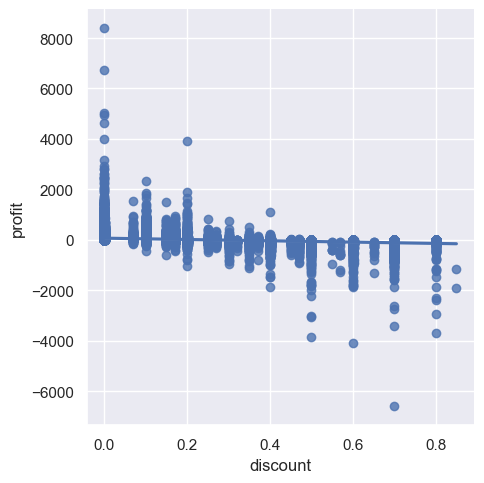

In [54]:
sns.lmplot(x='discount', y='profit', data=df)
sns.set(rc={'figure.figsize':(21,5)})
plt.show()


Observation

The discount vs profit analysis shows a strong negative relationship, where higher discounts lead to lower profits and frequent losses. Moderate or minimal discounting is more sustainable for maintaining profitability.

In [55]:
ship_profit = df.groupby('ship_mode')[['shipping_cost','profit']].mean().reset_index()


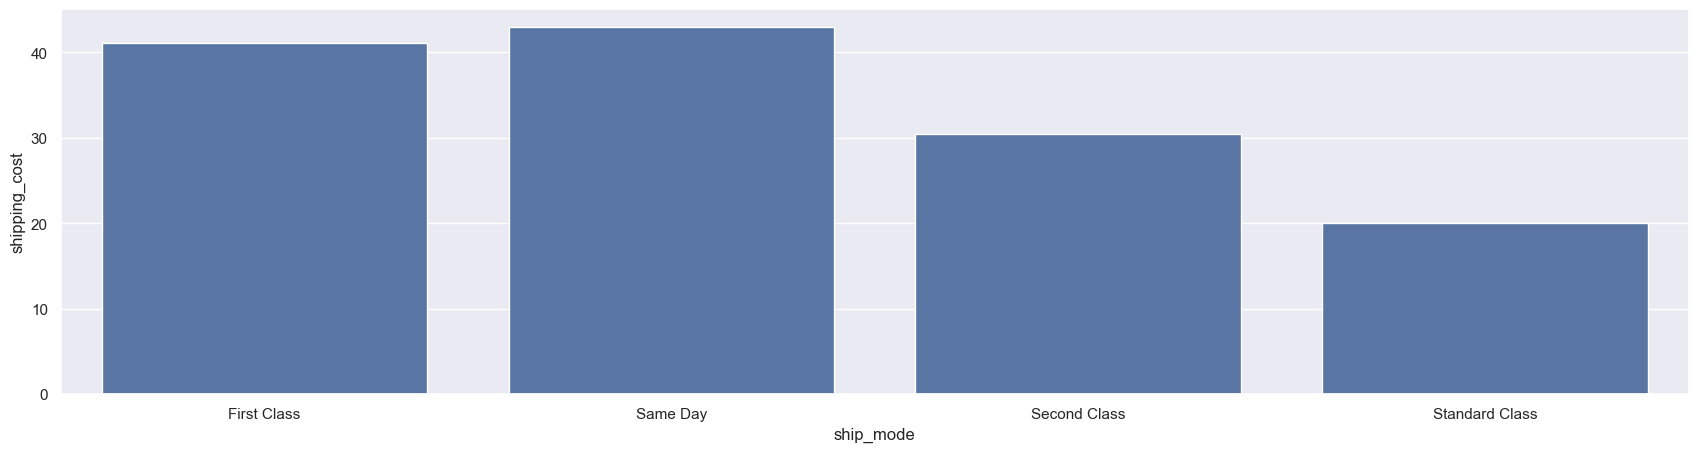

In [56]:
sns.barplot(x='ship_mode', y='shipping_cost', data=ship_profit)
plt.show()


Observation

The shipping cost analysis shows that Same Day and First Class shipping modes incur the highest costs, while Standard Class is the most cost-effective option. Optimizing shipping mode selection can significantly improve overall profitability.

In [57]:
top_products = df.groupby('product_name')['profit'].sum().nlargest(10).reset_index()


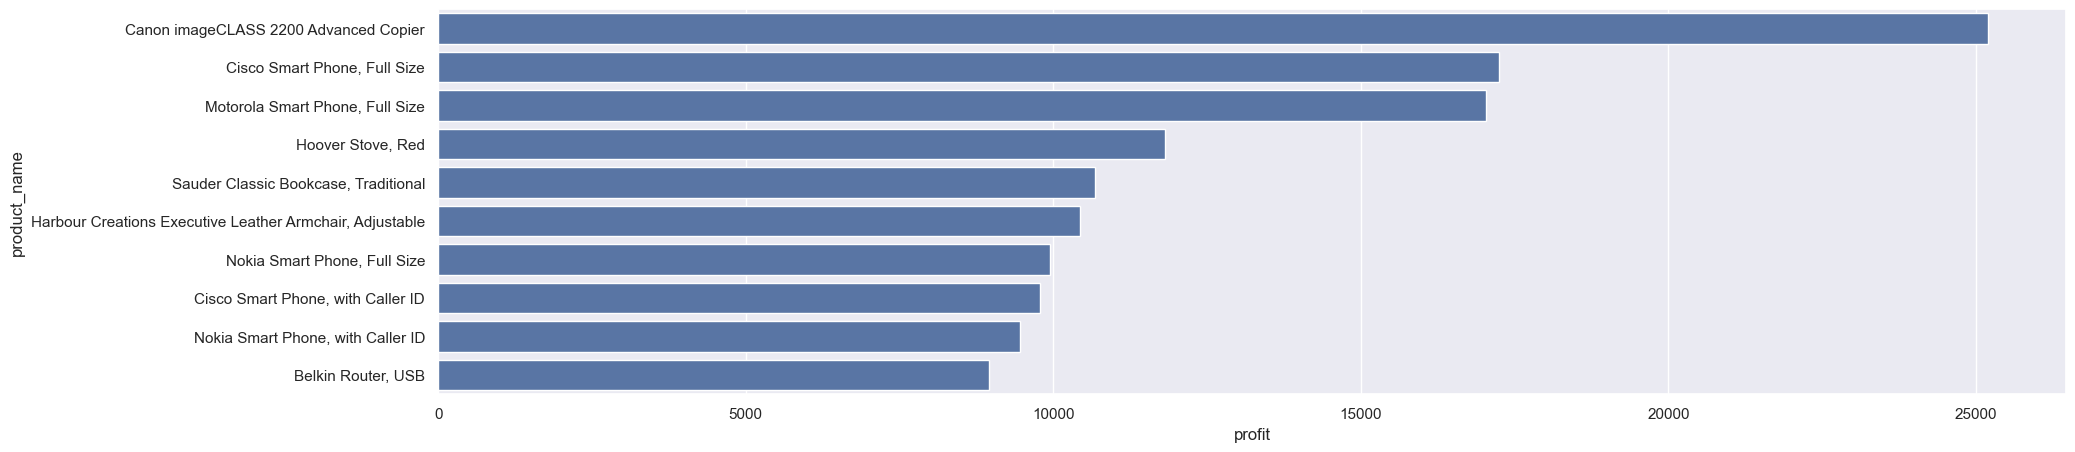

In [58]:
sns.barplot(x='profit', y='product_name', data=top_products)
plt.show()


Observation

The top 10 product analysis shows that a small number of products contribute a large share of total profit, with technology-based products dominating the list. Focusing on these high-performing products can significantly improve overall business profitability.

In [59]:
customer_sales = df.groupby('customer_name')['sales'].sum().reset_index()


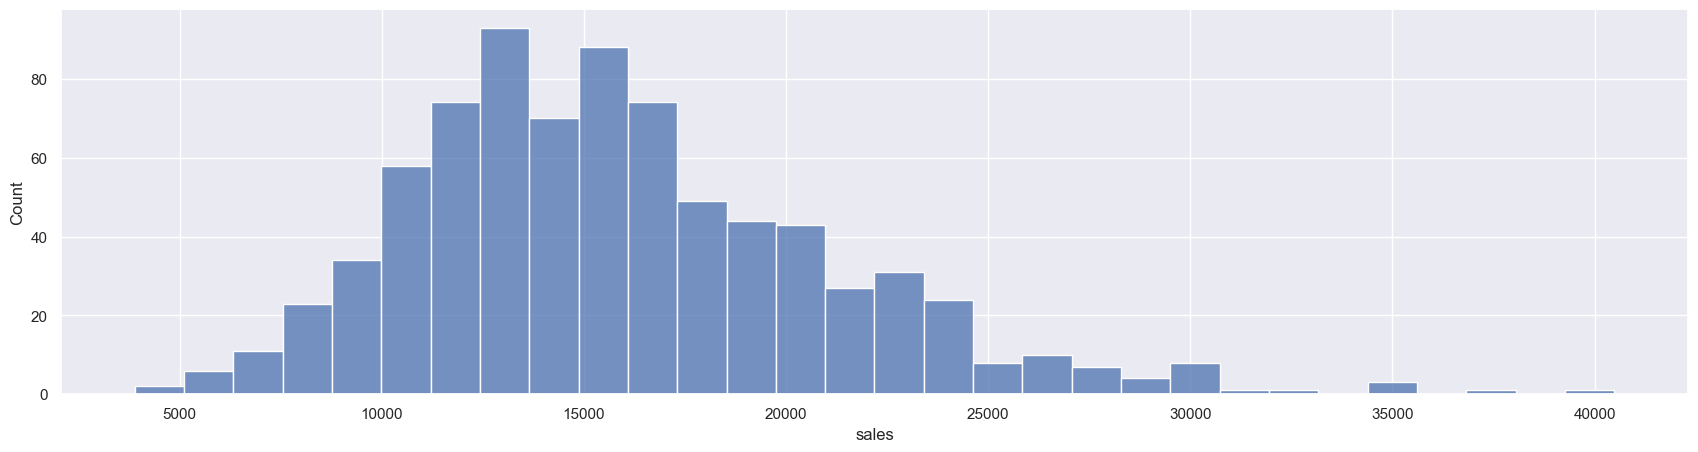

In [60]:
sns.histplot(customer_sales['sales'], bins=30)
plt.show()


Observation

The analysis shows that customer sales follow a right-skewed distribution where most customers generate moderate sales, while a few high-value customers contribute significantly to revenue. Additionally, high and medium priority orders generate higher average profits, highlighting the importance of priority-based customer and delivery strategies.

In [61]:
priority_profit = df.groupby('order_priority')['profit'].mean().reset_index()


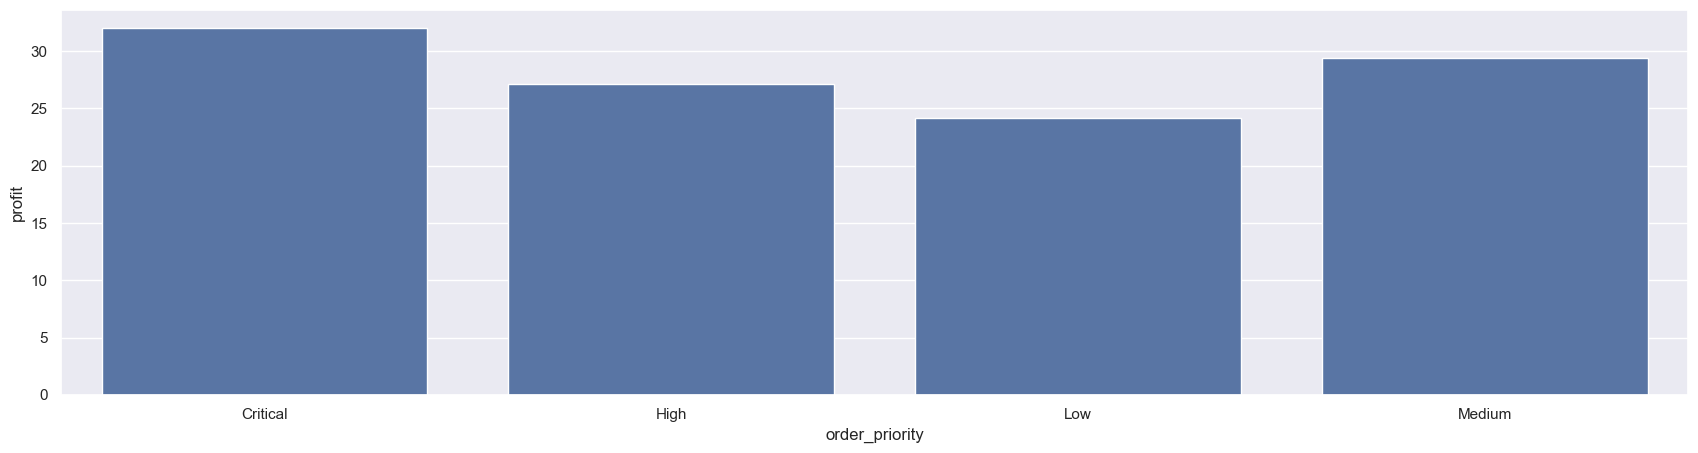

In [62]:
sns.barplot(x='order_priority', y='profit', data=priority_profit)
plt.show()


Observation

The analysis shows that Critical and High priority orders generate the highest average profit, while Low priority orders contribute the least. This highlights the importance of prioritizing urgent and high-value orders to maximize overall profitability.

Final Executive Summary 

This project presents a comprehensive analysis of sales data to evaluate business performance, customer behavior, and profitability across multiple dimensions, including product categories, regions, markets, shipping modes, discounts, and order priorities. Python-based data analysis and visualization techniques were used to identify meaningful patterns and relationships, enabling data-driven decision-making.

The analysis shows that sales distribution is right-skewed, where a large number of low- to medium-value orders coexist with a small number of high-value transactions that contribute significantly to overall revenue. The Technology category emerges as the most profitable due to high-margin products, while Office Supplies generate stable revenue through high order volumes. In contrast, the Furniture category exhibits relatively low profitability, mainly due to higher logistics costs and heavy discounting.

A strong negative relationship between discount and profit is observed, indicating that excessive discounting frequently results in losses. This highlights the importance of optimized pricing strategies. Regional and market-level analysis reveals that a limited number of markets and regions dominate total sales and profit, whereas other regions require targeted growth strategies. Additionally, shipping mode and order priority analysis indicates that faster and higher-priority deliveries generate higher profit margins but also involve increased operational costs.

Overall, the study demonstrates that profitability is not solely dependent on sales volume but is strongly influenced by pricing strategies, cost control, and operational efficiency. The insights derived from this analysis provide valuable guidance for improving profitability, optimizing logistics, and focusing on high-value customers and products.

Thank you!